In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

# Loading dataset
df = pd.read_csv("/content/drive/MyDrive/complaint.csv")

# Displaying first few rows
print(df.head())

# Checking for missing values
print(df.isnull().sum())

<ipython-input-5-eb580ef3e0ad>:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/complaint.csv")


  Date received                                            Product  \
0    29-01-2025  Credit reporting or other personal consumer re...   
1    31-01-2025  Credit reporting or other personal consumer re...   
2    30-01-2025  Credit reporting or other personal consumer re...   
3    29-01-2025  Payday loan, title loan, personal loan, or adv...   
4    28-01-2025                                           Mortgage   

                  Sub-product  \
0            Credit reporting   
1            Credit reporting   
2            Credit reporting   
3            Installment loan   
4  Conventional home mortgage   

                                               Issue  \
0               Incorrect information on your report   
1               Incorrect information on your report   
2                        Improper use of your report   
3                       Problem when making payments   
4  Applying for a mortgage or refinancing an exis...   

                                           

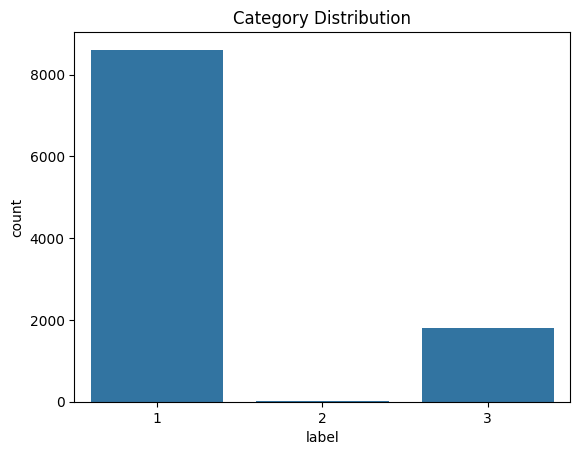

In [6]:
# Selecting only relevant columns
df = df[['Consumer complaint narrative', 'Product']].dropna()

# Renaming columns
df.columns = ['complaint', 'category']

# Mapping categories to numerical labels
category_mapping = {
    "Credit reporting, repair, or other": 0,
    "Debt collection": 1,
    "Consumer Loan": 2,
    "Mortgage": 3
}
df = df[df['category'].isin(category_mapping.keys())]  # Filter required categories
df['label'] = df['category'].map(category_mapping)

# Checking distribution of categories
sns.countplot(x=df['label'])
plt.title("Category Distribution")
plt.show()


In [7]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]  # Removing stopwords
    return " ".join(words)

# Applying text preprocessing
df['clean_complaint'] = df['complaint'].apply(preprocess_text)
print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             complaint         category  \
310  I want to stress that I did not give written p...  Debt collection   
323  I want to stress that I did not give written p...  Debt collection   
576  On XX/XX/year>, I recieved a phone call from p...  Debt collection   
577  2023 portfolio recovery petitioned XXXX XXXX A...  Debt collection   
637  Fix my credit now or face legal action! I've t...  Debt collection   

     label                                    clean_complaint  
310      1  want stress give written permission specific t...  
323      1  want stress give written permission specific t...  
576      1  xxxxyear recieved phone call portfolio recover...  
577      1  portfolio recovery petitioned xxxx xxxx al xxx...  
637      1  fix credit face legal action ive told multiple...  


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Converting text to TF-IDF vectors
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_complaint'])

# Labels
y = df['label']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Defining models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC()
}

# Training and Evaluating Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.9721955896452541
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1723
           2       0.00      0.00      0.00         2
           3       0.94      0.90      0.92       361

    accuracy                           0.97      2086
   macro avg       0.64      0.63      0.63      2086
weighted avg       0.97      0.97      0.97      2086



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Random Forest
Accuracy: 0.9745925215723873
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1723
           2       0.00      0.00      0.00         2
           3       0.96      0.90      0.93       361

    accuracy                           0.97      2086
   macro avg       0.64      0.63      0.64      2086
weighted avg       0.97      0.97      0.97      2086


Model: Naïve Bayes
Accuracy: 0.9645254074784276
              precision    recall  f1-score   support

           1       0.99      0.97      0.98      1723
           2       0.00      0.00      0.00         2
           3       0.87      0.94      0.90       361

    accuracy                           0.96      2086
   macro avg       0.62      0.64      0.63      2086
weighted avg       0.97      0.96      0.96      2086



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m


Model: SVM
Accuracy: 0.9736337488015341
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      1723
           2       0.00      0.00      0.00         2
           3       0.94      0.91      0.93       361

    accuracy                           0.97      2086
   macro avg       0.64      0.63      0.64      2086
weighted avg       0.97      0.97      0.97      2086



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizing text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_complaint'])
X_seq = tokenizer.texts_to_sequences(df['clean_complaint'])
X_padded = pad_sequences(X_seq, maxlen=100)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42, stratify=y)

# Building LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Evaluating model
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

print("\nLSTM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 79s 279ms/step - accuracy: 0.8250 - loss: 0.5914 - val_accuracy: 0.9319 - val_loss: 0.1876
Epoch 2/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 75s 288ms/step - accuracy: 0.9604 - loss: 0.1287 - val_accuracy: 0.9607 - val_loss: 0.1243
Epoch 3/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 77s 268ms/step - accuracy: 0.9748 - loss: 0.0855 - val_accuracy: 0.9664 - val_loss: 0.1030
Epoch 4/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 82s 268ms/step - accuracy: 0.9870 - loss: 0.0487 - val_accuracy: 0.9674 - val_loss: 0.1120
Epoch 5/5
261/261 ━━━━━━━━━━━━━━━━━━━━ 85s 281ms/step - accuracy: 0.9935 - loss: 0.0317 - val_accuracy: 0.9669 - val_loss: 0.1217
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step

LSTM Model Evaluation:
Accuracy: 0.9669223394055608
              precision    recall  f1-score   support

           1       0.99      0.97      0.98      1723
           2       0.00      0.00      0.00         2
           3       0.88      0.94      0.91       361

    accuracy                           

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


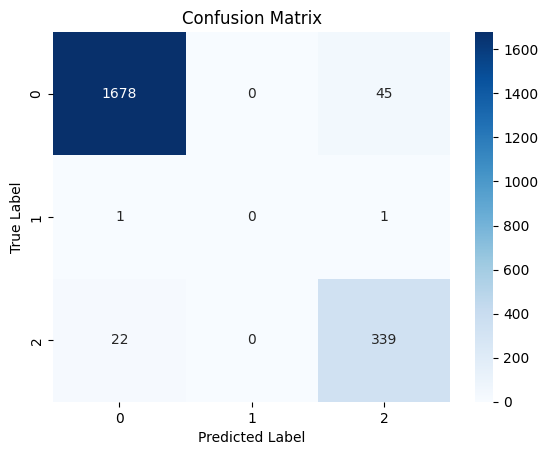

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [13]:
def predict_category(text):
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = models["Logistic Regression"].predict(vectorized_text)

    category_map = {0: "Credit reporting", 1: "Debt collection", 2: "Consumer Loan", 3: "Mortgage"}
    return category_map[prediction[0]]

# Example
print(predict_category("My credit report has an error, and they won't fix it."))


Debt collection
